# Spectral Graph Model's frequency responses

In [1]:
#spectrome modules
from spectrome.forward import runforward
from spectrome.utils import functions, path
from spectrome.brain import Brain

#generic modules
import matplotlib.pyplot as plt
import numpy as np

Create spectrome brain object with HCP connectomes:

In [2]:
brain = Brain.Brain()

hcp_dir = path.get_data_path() # get path to data folder where hcp files are
brain.add_connectome(hcp_dir)

# re-ordering for DK atlas and normalizing the connectomes:
brain.reorder_connectome(brain.connectome, brain.distance_matrix)
brain.bi_symmetric_c()
brain.reduce_extreme_dir()
print(brain.reducedConnectome.shape)

(86, 86)


first run spectral graph model to obtain eigenmodes of complex laplacian:

In [7]:
#define frequency bins of interest:
fmin = 2
fmax = 45
fvec = np.linspace(fmin,fmax,40)

In [8]:
from scipy.io import loadmat

# load optimized parameters:
opparam = loadmat('/home/axiezai/lab/SCFC_eeg/data/SCFC_opparam_HCP.mat')
brain.ntf_params['tau_e'] = opparam['output']['param'][0,1][0]
brain.ntf_params['tau_i'] = opparam['output']['param'][0,1][1]
brain.ntf_params['alpha'] = opparam['output']['param'][0,1][2]
brain.ntf_params['speed'] = opparam['output']['param'][0,1][3]
brain.ntf_params['gei'] = opparam['output']['param'][0,1][4]
brain.ntf_params['gii'] = opparam['output']['param'][0,1][5]
brain.ntf_params['tauC'] = opparam['output']['param'][0,1][6]

In [9]:
# run sgm:
model_spectrum, freq_response, eigvalues, eigvectors = runforward.run_forward(brain, brain.ntf_params, fvec)
print(model_spectrum.shape)

(86, 40)


### Frequency dependent behavior of complex eigenmodes:

Text(0, 0.5, 'Frequency (Hz)')

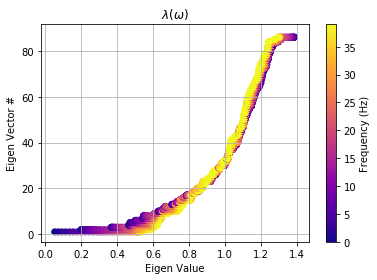

In [11]:
# Lambda(Omega) Plot with default parameters
cmap = plt.get_cmap('plasma')
fig_lomega, ax_lomega = plt.subplots()
for i in np.arange(0,eigvalues.shape[1]):
    fig_scatter = ax_lomega.scatter(np.abs(eigvalues[:,i]),np.ones(eigvalues.shape[0])*(i+1),
                     c = np.arange(0,fvec.size), cmap = cmap)
    
ax_lomega.grid(True)
clb = fig_lomega.colorbar(fig_scatter, ax = ax_lomega)
ax_lomega.set_xlabel('Eigen Value')
ax_lomega.set_ylabel('Eigen Vector #')
ax_lomega.set_title(r'$\lambda(\omega)$')
clb.ax.set_ylabel('Frequency (Hz)')

### Magnitude of the frequency response of each eigenmode:

In [12]:
freq_response.shape

(40, 86)

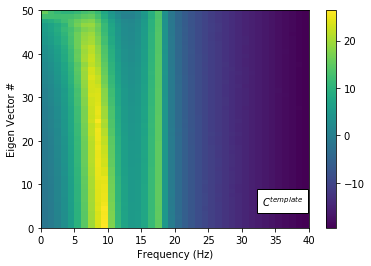

In [14]:
fig_hcp, ax_hcp = plt.subplots()
ax_1 = ax_hcp.imshow(functions.mag2db(np.abs(np.transpose(freq_response[:,0:50]))), extent = [0, 40, 0, 50], aspect = 'auto')
#ax_hcp.set_title('Frequency Response with Optimized Parameters')
ax_hcp.set_xlabel('Frequency (Hz)')
ax_hcp.set_ylabel('Eigen Vector #')
#mpl.gca().invert_yaxis()
#mpl.yticks(np.arange(0,50,10),[50,40,30,20,10])
ax_hcp.text(33,5, r'$C^{template}$', bbox = {'facecolor':'white','pad':5})
fig_hcp.colorbar(ax_1)